In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal


In [4]:
# Define simulation parameters
Omega_x = np.linspace(-5, 5, 5)  # Range of Omega_x values
Omega_y = 2                     # Constant Omega_y value
Omega_z = 0.7                   # Constant Omega_z value
step = 2000000                   # Number of simulation steps
dt = 2 / step                   # Time step size
w = 100                         # Frequency

# Initialize spin components
Sx = [0]
Sy = [0]
Sz = [0]

# Define time array
t = np.linspace(0, step * dt, step)

# Define Omega_0 range
Omega_0 = np.linspace(0, 500, 50)

# Initialize result storage for harmonic analysis
mod_out_1st_harm_sin = []
mod_out_1st_harm_cos = []

In [5]:
# Function definitions for spin derivatives
def Sdotz(Omega_x, Omega_y, Sx, Sy, Sz):
    return Omega_x * Sy - Omega_y * Sx + 0.5 - Sz

def Sdoty(Omega_x, Omega_0, Omega_z, Sx, Sy, Sz, w, t):
    return (Omega_z + Omega_0 * np.cos(w * t)) * Sx - Omega_x * Sz - Sy

def Sdotx(Omega_y, Omega_0, Omega_z, Sx, Sy, Sz, w, t):
    return Omega_y * Sz - (Omega_z + Omega_0 * np.cos(w * t)) * Sy - Sx


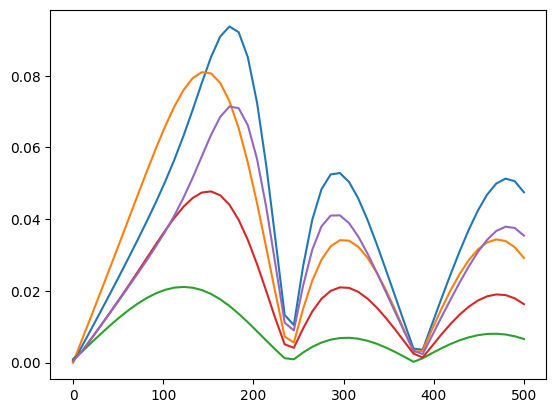

In [6]:
# Perform simulation for each Bx in Omega_x
for Bx in Omega_x:
    for o in range(len(Omega_0)):
        for i in range(len(t) - 1):
            # Update spin components using Euler integration
            Sx.append(Sx[i] + Sdotx(Omega_y, Omega_0[o], Omega_z, Sx[i], Sy[i], Sz[i], w, t[i]) * dt)
            Sy.append(Sy[i] + Sdoty(Bx, Omega_0[o], Omega_z, Sx[i], Sy[i], Sz[i], w, t[i]) * dt)
            Sz.append(Sz[i] + Sdotz(Bx, Omega_y, Sx[i], Sy[i], Sz[i]) * dt)
        
        # Compute 1st harmonic components
        mod_out_1st_harm_sin.append(np.average(Sx * np.sin(w * t)))
        mod_out_1st_harm_cos.append(np.average(Sx * np.cos(w * t)))

        # Reset spin components for next Omega_0
        Sx = [0]
        Sy = [0]
        Sz = [0]

    # Compute magnitude of the 1st harmonic
    mod_out_1st_harm_r = [
        np.sqrt(mod_out_1st_harm_cos[i]**2 + mod_out_1st_harm_sin[i]**2) for i in range(len(Omega_0))
    ]

    # Plot results for the current Bx
    plt.plot(Omega_0, mod_out_1st_harm_r, label=f'Bx = {Bx}')

    # Clear results for next Bx
    mod_out_1st_harm_sin.clear()
    mod_out_1st_harm_cos.clear()
# Plot settings
plt.title(f"R1 vs Omega_0, Omega_y = {Omega_y}, Omega_z = {Omega_z}")
plt.xlabel("Omega_0")
plt.ylabel("R1 (1st Harmonic Magnitude)")
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipykernel_2677255/3882236617.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


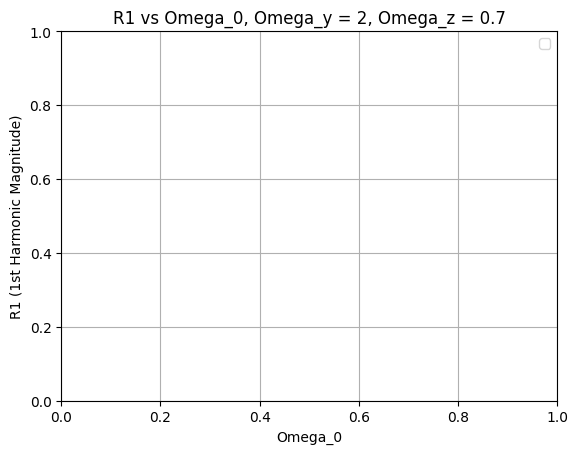

In [ ]:

# save the plot
